<a href="https://colab.research.google.com/github/napoles-uach/clusters/blob/master/clustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/petersenjppb/Codes/master/ener_oparameter-wcna.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4648k  100 4648k    0     0   801k      0  0:00:05  0:00:05 --:--:-- 1412k


In [0]:
ener=pd.read_csv('ener_oparameter-wcna.csv')
ener.columns=ener.columns.str.replace(' ','')
ener = ener.sort_values(['Etot'])

In [0]:
#ener=pd.read_csv('ener4.csv')
#etot=pd.read_csv('ener4.csv',usecols=['Etot'])


In [72]:
ener

,#MCstep,Etot,sig666,sig655,sig555,sig544,sig533,sig532,sig522,sig521,sig444,sig433,sig422,sig421,sig411,sig400,sig322,sig311,sig300,sig211,sig200,sig100,sig000
16148,16149,-142.351547,0.000000,0.0,0.068571,0.045714,0.000000,0.0,0.0,0.0,0.000000,0.097143,0.142857,0.022857,0.005714,0.0,0.177143,0.240000,0.011429,0.034286,0.142857,0.005714,0.005714
15132,15133,-142.351547,0.000000,0.0,0.102564,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384615,0.000000,0.000000,0.0,0.256410,0.256410,0.000000,0.000000,0.000000,0.000000,0.000000
8269,8270,-142.351547,0.000000,0.0,0.102564,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384615,0.000000,0.000000,0.0,0.256410,0.256410,0.000000,0.000000,0.000000,0.000000,0.000000
7460,7461,-142.351547,0.004464,0.0,0.116071,0.058036,0.000000,0.0,0.0,0.0,0.000000,0.133929,0.205357,0.026786,0.000000,0.0,0.178571,0.098214,0.004464,0.089286,0.080357,0.004464,0.000000
4662,4663,-142.351547,0.000000,0.0,0.102564,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384615,0.000000,0.000000,0.0,0.256410,0.256410,0.000000,0.000000,0.000000,0.000000,0.000000
13782,13783,-142.351547,0.000000,0.0,0.102564,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384615,0.000000,0.000000,0.0,0.256410,0.256410,0.000000,0.000000,0.000000,0.000000,0.000000
16131,16132,-142.351547,0.000000,0.0,0.102564,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384615,0.000000,0.000000,0.0,0.256410,0.256410,0.000000,0.000000,0.000000,0.000000,0.000000
3800,3801,-142.351547,0.000000,0.0,0.102564,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384615,0.000000,0.000000,0.0,0.256410,0.256410,0.000000,0.000000,0.000000,0.000000,0.000000
7451,7452,-142.351547,0.000000,0.0,0.102564,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384615,0.000000,0.000000,0.0,0.256410,0.256410,0.000000,0.000000,0.000000,0.000000,0.000000
16149,16150,-142.351547,0.000000,0.0,0.086957,0.086957,0.000000,0.0,0.0,0.0,0.000000,0.198068,0.033816,0.028986,0.000000,0.0,0.280193,0.140097,0.004831,0.057971,0.077295,0.004831,0.000000


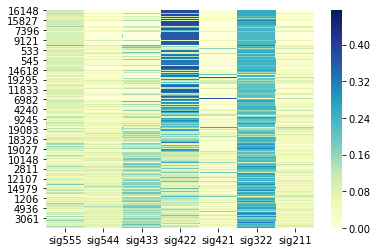

In [73]:
#xx=pd.read_csv('ener4.csv')
X=pd.DataFrame(ener,columns=['sig555','sig544','sig433','sig422','sig421','sig322','sig211'])
#Y=pd.read_csv('ener4.csv',usecols=['Etot'])
import seaborn as sns
sns.heatmap(X, cmap="YlGnBu")
plt.show()

In [0]:
kmeans=KMeans(n_clusters=3)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_


In [75]:
print('clusters:\n{}'.format(kmeans.labels_[:50]))


clusters:
[2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 0 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 0 1 1
 1 2 1 1 1 1 0 1 1 2 1 1 1]


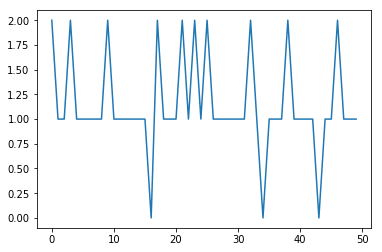

In [76]:
plt.plot(kmeans.labels_[:50])